# Name : Snehal Shyam Jagtap

## Assignement No 16



### K-NEAREST NEIGHBOURS
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

## Step 1: Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Step 2: Load Dataset

In [24]:
data = pd.read_csv('Zoo.csv')

In [25]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [27]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [28]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [29]:
data.shape

(101, 18)

C:\Users\sneha\AppData\Local\Temp\ipykernel_17216\863118281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


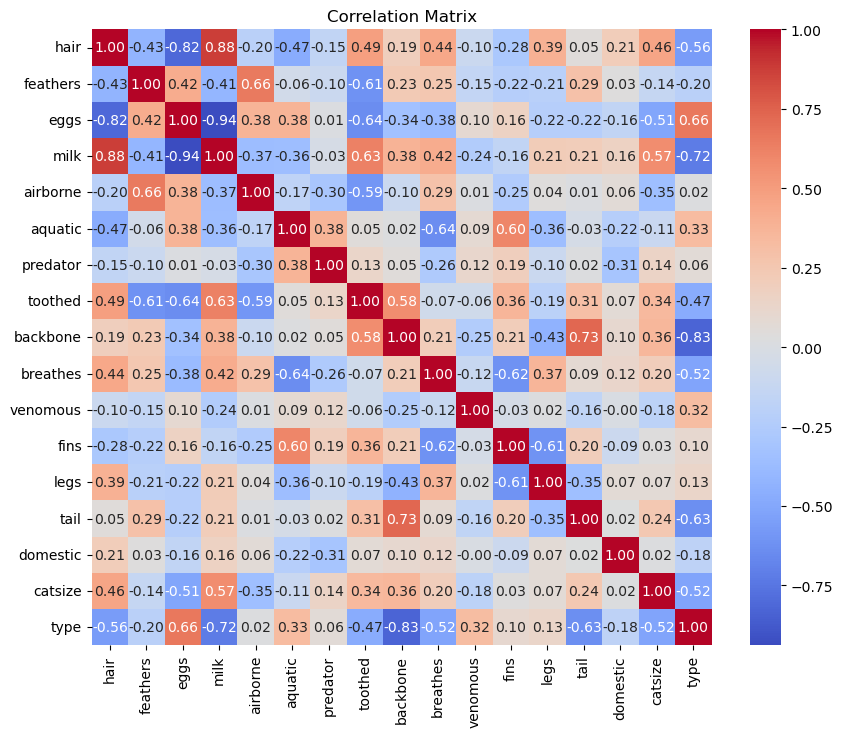

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Step 3: Data Preprocessing

In [31]:
X = data.drop('type', axis=1)
y = data['type']

In [32]:
X = data.drop(['animal_name', 'type'], axis=1, errors='ignore')

In [33]:
# Encode categorical columns using LabelEncoder 
label_encoder = LabelEncoder()

In [34]:
# Apply LabelEncoder to all columns with categorical data
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 4: Optimal K selection

In [37]:
k_values = range(1, 21)
cross_val_scores = []

In [38]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=

In [39]:
optimal_k = k_values[np.argmax(cross_val_scores)]
print(f"\nOptimal value of K: {optimal_k}")


Optimal value of K: 1


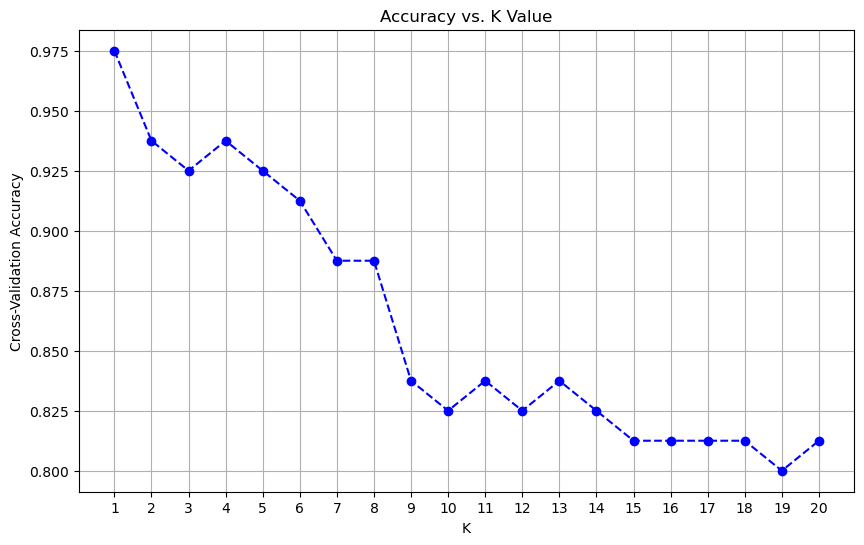

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


## Step 5: Implement KNN with optimal k

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [16]:
y_pred = knn.predict(X_test)

## Step 6: EValuate the Model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy * 100:.2f}%')


Accuracy: 95.24%


In [18]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


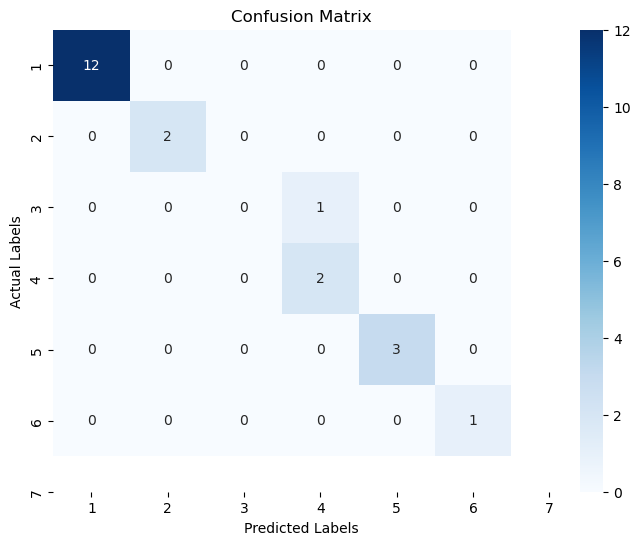

In [19]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Step 7: Additional Insights

In [41]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Std Dev': X.std()})
feature_importance = feature_importance.sort_values(by='Std Dev', ascending=False)

In [42]:
print("\nFeature Importance (Approximation using Std Dev):")
print(feature_importance)


Feature Importance (Approximation using Std Dev):
                 Feature    Std Dev
animal name  animal name  28.968829
legs                legs   2.033385
predator        predator   0.499505
catsize          catsize   0.498314
hair                hair   0.496921
eggs                eggs   0.495325
milk                milk   0.493522
toothed          toothed   0.491512
aquatic          aquatic   0.481335
tail                tail   0.439397
airborne        airborne   0.427750
breathes        breathes   0.407844
feathers        feathers   0.400495
backbone        backbone   0.384605
fins                fins   0.376013
domestic        domestic   0.336552
venomous        venomous   0.271410


C:\Users\sneha\AppData\Local\Temp\ipykernel_17216\186588933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Std Dev', y='Feature', data=feature_importance, palette='viridis')


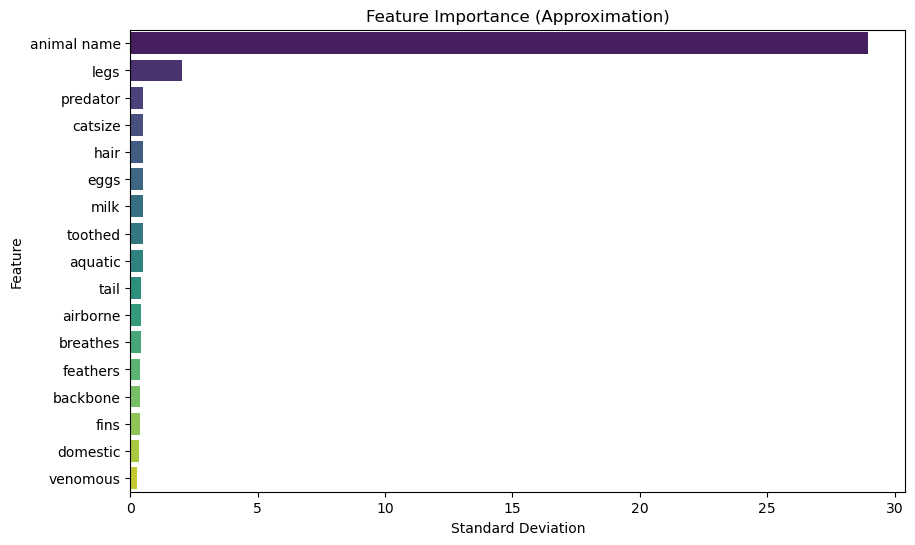

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Std Dev', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Approximation)')
plt.xlabel('Standard Deviation')
plt.ylabel('Feature')
plt.show()

# Interview Questions

## 1. What are the key hyperparameters in KNN?

The key hyperparameters in KNN (K-Nearest Neighbors) are:

- **`n_neighbors` (K)**: 
  - The number of nearest neighbors to consider when making a prediction. 
  - Choosing an optimal value for `K` is crucial for balancing bias and variance.
  - Lower values of `K` may lead to overfitting, while higher values may result in underfitting.

- **`metric` (Distance Metric)**: 
  - Determines how the distances between data points are calculated. Common metrics include Euclidean, Manhattan, and Minkowski distances.

- **`weights`**:
  - Defines how the neighbors' votes are weighted during prediction.
  - Common options:
    - **`uniform`**: All neighbors have equal weight.
    - **`distance`**: Closer neighbors have more weight.

- **`algorithm`**:
  - Determines the algorithm used to compute nearest neighbors. Options include:
    - **`brute`**: Brute-force search.
    - **`kd_tree`**: Uses a KD-tree for efficiency.
    - **`ball_tree`**: Uses a Ball-tree for efficiency.
    - **`auto`**: Chooses the best algorithm automatically based on the data.



---

## 2. What distance metrics can be used in KNN?

The following distance metrics can be used in KNN:

1. **Euclidean Distance**:
   - The straight-line distance between two points in Euclidean space.
   - Formula: 
     \[
     d(p, q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
     \]

2. **Manhattan Distance** (L1 norm):
   - The sum of the absolute differences of their coordinates.
   - Formula:
     \[
     d(p, q) = \sum_{i=1}^n |q_i - p_i|
     \]

3. **Minkowski Distance**:
   - A generalization of both Euclidean and Manhattan distances.
   - Formula:
     \[
     d(p, q) = \left( \sum_{i=1}^n |q_i - p_i|^p \right)^{1/p}
     \]
   - Special cases:
     - \( p = 1 \): Manhattan Distance.
     - \( p = 2 \): Euclidean Distance.

4. **Chebyshev Distance**:
   - The maximum absolute difference along any coordinate dimension.
   - Formula:
     \[
     d(p, q) = \max_i |q_i - p_i|
     \]

5. **Hamming Distance**:
   - Used for categorical or binary data, representing the number of positions where two sequences differ.

6. **Mahalanobis Distance**:
   - Accounts for correlations in the dataset.
   - Useful for detecting outliers or in cases where features have different scales.

7. **Cosine Similarity** (or distance):
   - Measures the cosine of the angle between two vectors.
   - Used for text or high-dimensional data:
     \[
     \text{Cosine Similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
     \]

8. **Jaccard Distance**:
   - Measures dissimilarity between two sets.
   - Commonly used in binary and categorical data.

Each distance metric is suited to specific types of data and applications. The choice of metric significantly affects the KNN algorithm's performance.
